In [1]:
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
from sklearn.model_selection import ParameterGrid

import sys
sys.path.insert(0, "/Users/tgermain/Documents/code/Persistent Pattern Discovery/src/")

from methods import BasePersistentPattern
from competitors import Baseline,LatentMotif,MatrixProfile,Valmod,Grammarviz
import os

## Load dataset

In [2]:
DATASET_PATH = "./dataset/mitdb800/dataset.pkl"
LABEL_PATH = "./dataset/mitdb800/labels.pkl"

In [3]:
with open(DATASET_PATH,"rb") as f: 
    dataset = pickle.load(f)

with open(LABEL_PATH,"rb") as f: 
    labels = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './dataset/mitdb800/dataset.pkl'

Text(0.5, 1.0, 'Example of signal and labels')

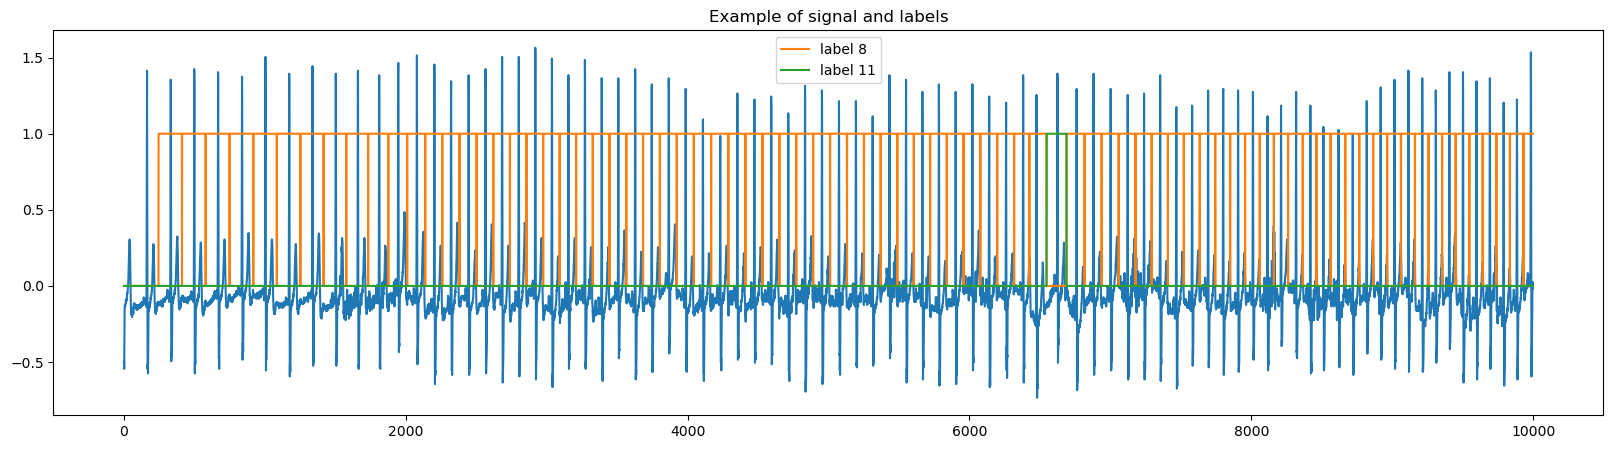

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dataset[0][:10000])
for i,l in enumerate(labels[0][:,:10000]): 
    if np.sum(l)>0:
        plt.plot(l,label=f"label {i}")
plt.legend()
plt.title("Example of signal and labels")

## Set Experiment

In [ ]:
def get_trial(folder_path):
    lst = os.listdir(folder_path)
    return len(lst)

In [ ]:
RESULT_FOLDER = "./Results/mitdb_800/"
TRIAL = get_trial(RESULT_FOLDER)
BACKUP_PATH = f'./Results/mitdb_800/trial_{TRIAL}.csv'
EXPERIMENT_PATH = f'./Results/mitdb_800/trial_{TRIAL}.pickle'

In [ ]:
np.linspace(2,50,10)[2]

12.666666666666666

In [4]:
configs_bpp = ParameterGrid(dict(n_patterns= [1] ,n_neighbors = [5],wlen = [60],alpha = [20], beta = [0],n_jobs = [6]))
configs_bpp = [{'wlen': 60, 'n_patterns': 1, 'n_neighbors': 5, 'n_jobs': 6, 'beta': 0, 'alpha': 20},{'wlen': 60, 'jump': 1, 'n_neighbors': 5, 'n_jobs': 6, 'beta': 0, 'alpha': 20}]
configs_mp = ParameterGrid(dict(n_patterns = [1] ,radius_ratio = [15],wlen = [95],distance_name = ['NormalizedEuclidean'],n_jobs = [6]))
configs_vm = ParameterGrid(dict(n_patterns = [1] ,radius_ratio = [40],min_wlen = [80], max_wlen = [120],step=[5],distance_name = ['NormalizedEuclidean'],n_jobs = [6]))
configs_bl = ParameterGrid(dict(n_patterns = [1] ,radius = [30],wlen = [95],distance_name = ['NormalizedEuclidean'],n_jobs = [6]))
configs_lm = ParameterGrid(dict(n_patterns = [1] ,radius = [10],wlen = [95], learning_rate = [0.1]))
configs_gm = ParameterGrid(dict(n_patterns =[1], alphabet_size=[4],numerosity=["MINDIST"],window_size = [95],word_size = [5]))

In [ ]:
configs_bpp = [{'wlen': 60, 'n_patterns': 1, 'n_neighbors': 5, 'n_jobs': 6, 'beta': 0, 'alpha': 20},{'wlen': 60, 'jump': 1, 'n_neighbors': 5, 'n_jobs': 6, 'beta': 0, 'alpha': 20}]

In [ ]:
algorithms = [
    BasePersistentPattern,
    MatrixProfile,
    Valmod,
    Baseline,
    LatentMotif,
    Grammarviz,
]

configurations = [
    configs_bpp,
    configs_mp, 
    configs_vm, 
    configs_bl, 
    configs_lm, 
    configs_gm,
]

## Start experiment

In [ ]:
from experiment import Experiment

In [ ]:
ese = Experiment(algorithms,configurations,njobs=1)
ese.run_experiment(dataset[:10],labels[:10],backup_path=BACKUP_PATH,batch_size=3,logs_path="./Results/Synthetic/logs.txt")
with open(EXPERIMENT_PATH, 'wb') as filehandler: 
    pickle.dump(ese,filehandler)

signal_id: 0, algo: BasePersistentPattern, config_id: 0, f-auc: 0.38, ami: 0.0
signal_id: 0, algo: BasePersistentPattern, config_id: 1, f-auc: 0.39, ami: 0.01
signal_id: 0, algo: MatrixProfile, config_id: 0 failed to fit.
signal_id: 0, algo: Valmod, config_id: 0, f-auc: 0.25, ami: 0.0
